In [1]:
import uns
from uns import training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
training.columns

Index(['subject', 'img', 'pixels', 'maskArea', 'maskC', 'maskS', 'maskV',
       'maskContour', 'hasmask', 'XYextents', 'maskW', 'maskH'],
      dtype='object')

## Images

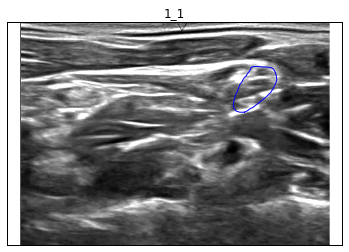

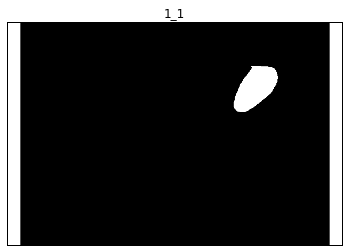

In [5]:
img = uns.image_pair(training.iloc[0])
ax = img.image.plot()
img.mask.plot()
img.mask.plot_contour(ax=ax)

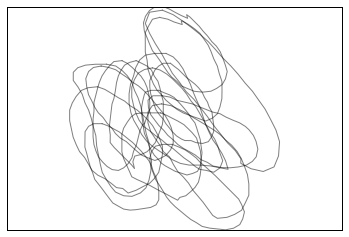

In [6]:
indices = [84, 798, 800, 1270, 1513, 1914, 2221, 2236, 2735, 3062, 3428, 3898, 4157, 4175, 4277, 4296, 5019]
batch = uns.batch(training.iloc[indices])
ax = None
for img in batch:
    ax = img.mask.plot_contour(ax=ax, color='k', alpha=0.5)

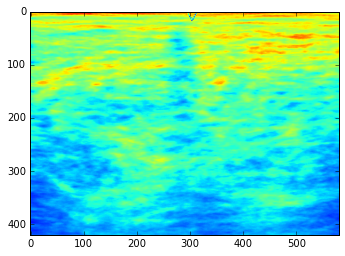

In [13]:
batchsum = np.sum(batch.array(), axis=0)
plt.imshow(batchsum)

## pull out rectangles around mask

In [ ]:
def extents(maskContour):
    minx, miny, maxx, maxy = [0,0,0,0]
    try:
        minx, miny = np.min(maskContour, axis=0)
        maxx, maxy = np.max(maskContour, axis=0)
    except:
        pass
    return np.array([minx, maxx, miny, maxy], dtype=np.int16)

training['XYextents'] = training['maskContour'].map(extents)
training['maskW'] = training['XYextents'].map(lambda x: x[1]-x[0])
training['maskH'] = training['XYextents'].map(lambda x: x[3]-x[2])


In [ ]:
training_data['hasmask'] = training_data['pixels'].map(lambda x: not(pd.isnull(x)))

In [ ]:
training.head()

In [ ]:
training.to_msgpack('training.bin')

In [ ]:
training.index

In [ ]:
for row in training.ix[indices].iterrows():
    c = np.mean(row[1]['maskContour'], axis=0)
    cmask = row[1]['maskContour'] - c
    _,s,V = np.linalg.svd(cmask)
    
    row[1]['maskC'] = c
    row[1]['maskS'] = s
    row[1]['maskV'] = V
    training.ix[row[0]] = row[1]

In [ ]:
training.ix[indices]

In [ ]:
training.ix[row[0]]

In [ ]:
row[0]

In [ ]:
R = row[1]

In [ ]:
R.name